In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [104]:
dataset = pd.read_csv("train.csv")

In [105]:
dataset_cleaned = dataset.dropna()

categorical_columns = dataset_cleaned.select_dtypes(include=['object']).columns
dataset_encoded = pd.get_dummies(dataset_cleaned, columns=categorical_columns)

In [106]:
X, y = (dataset_encoded.drop(columns=['Survived']), dataset_encoded['Survived'])

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Allen, Miss. Elisabeth Walton","Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
170,171,1,61.0,0,0,33.5000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
462,463,1,47.0,0,0,38.5000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11,12,1,58.0,0,0,26.5500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
194,195,1,44.0,0,0,27.7208,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
498,499,1,25.0,1,2,151.5500,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [108]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [109]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "Naive Bayes",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    GaussianNB(),
]


ValueError: n_features must be equal to 2. Got 454 instead.

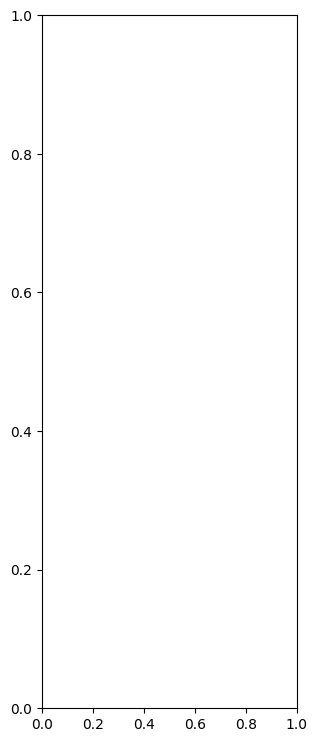

In [110]:

# Plot settings
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
figure = plt.figure(figsize=(27, 9))
n_classifiers = len(classifiers)

# Plotting
for i, clf in enumerate(classifiers):
    ax = plt.subplot(1, n_classifiers, i + 1)
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(clf, X.values, cmap=cm, alpha=0.8, ax=ax, eps=0.5)
    ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    ax.set_xlim(X.values[:, 0].min() - 0.5, X.values[:, 0].max() + 0.5)
    ax.set_ylim(X.values[:, 1].min() - 0.5, X.values[:, 1].max() + 0.5)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])
    ax.text(X.values[:, 0].max() - 0.3, X.values[:, 1].min() + 0.3, f"{score:.2f}".lstrip("0"), size=15, horizontalalignment="right")

plt.tight_layout()
plt.show()